# Punktpartikkel i 2D

### FY1003 Elektrisitet og Magnetisme - Numerisk Øving 1

Det elektriske felt og potensial for en punktpartikkel er allerede kjent i vilkårlig dimensjon. Hensikten med denne øvingen er å lære hvordan man håndterer numerikk i flere dimensjoner, både mht. de forskjellige metodene som fins for å plotte 2-dimensjonale systemer, og bruk av meshgrids. Det forventes at bruk av 1-dimensjonale arrays er kjent fra tidligere. 

### Oppgave 1: Elektrisk Potensial

Fra Coloumbs lov er det kjent at det elektriske potensialet i 2 dimensjoner en avstand, $r = \sqrt{x^2 + y^2}$, fra en punktpartikkel med ladning $q$ er gitt ved 
\begin{equation}
V(r) = \frac{q}{4\pi \epsilon_0}\frac{1}{r}\text{,}
\end{equation}
hvor $\epsilon_0$ er den elektriske permittivitet i vakum. Første del av øvingen vil gå ut på å plotte dette potensialet for en punktpartikkel med ladning $q = e$ plassert i origo, mellom $\pm L = \pm 10\text{nm}$.

$\textbf{a)}$ Ofte når man jobber med numerikk er det hensiktsmessig å innføre nye dimensjonsløse variabler, f.eks. $v/c$ hvis man jobber med hastigheter nær lysets hastighet, eller $V/V_0$ om man jobber med et konstant potensial. Utfør et slikt variabelskifte på potensialet og posisjonen slik at de blir dimensjonsløse.

------------

Skriv her eller på papir

----------------

$\textbf{b)}$ For å løse problemer i to dimensjoner er det nødvendig med en ny måte å diskretisere koordinatene. Det er ikke lenger tilstrekkelig med éndimensjonale $1 \times n$ arrays. Vi trenger enten en $n \times n$ array hvor hvert punkt er en 2-dimensjonal vektor, eller en separat $n \times n$ array for hver akse. I denne øvingen skal vi bruke den sistnevnte metoden, ved å bruke $\texttt{numpy}$s $\texttt{meshgrid}$ funksjon.

Bruk $\texttt{np.meshgrid}$ til å generere to variabler, $\texttt{xv}$ og $\texttt{yv}$, som inneholder $x$ og $y$ koordinater respektivt.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
n = 20
x = y = np.linspace(-10, 10, n)

xv, yv = np.meshgrid(x,-y)

$\textbf{c)}$ Via bruk av array-operasjoner, lag en variabel $\texttt{V}$ som inneholder potensialet $V$ for alle $x$ og $y$. Merk at det her vil oppstå en singularitet i $\vec{r} = 0$ som må tas stilling til. En måte å håndtere dette problemet er å sette verdien for potensialet over en viss grense lik konstant, f.eks. $\texttt{V[}>\texttt{c]} = \texttt{c}$.

In [3]:
v = 1/np.sqrt(xv**2+yv**2)

[[0.07071068 0.07452413 0.07848828 0.08253073 0.08654263 0.09037378
  0.09383431 0.09670745 0.0987763  0.09986178 0.09986178 0.0987763
  0.09670745 0.09383431 0.09037378 0.08654263 0.08253073 0.07848828
  0.07452413 0.07071068]
 [0.07452413 0.07902958 0.08380541 0.08878117 0.09383431 0.0987763
  0.10334638 0.1072232  0.11006404 0.11157184 0.11157184 0.11006404
  0.1072232  0.10334638 0.0987763  0.09383431 0.08878117 0.08380541
  0.07902958 0.07452413]
 [0.07848828 0.08380541 0.08956686 0.09572062 0.10214463 0.10861577
  0.1147832  0.12016655 0.12420689 0.12638612 0.12638612 0.12420689
  0.12016655 0.1147832  0.10861577 0.10214463 0.09572062 0.08956686
  0.08380541 0.07848828]
 [0.08253073 0.08878117 0.09572062 0.10334638 0.11157184 0.12016655
  0.12868424 0.13641205 0.14241102 0.14572335 0.14572335 0.14241102
  0.13641205 0.12868424 0.12016655 0.11157184 0.10334638 0.09572062
  0.08878117 0.08253073]
 [0.08654263 0.09383431 0.10214463 0.11157184 0.12213663 0.13368353
  0.14572335 0.157

$\textbf{d)}$ Plot det dimensjonsløse potensialet $V$ både som en heatmap og som en 3d overflate.

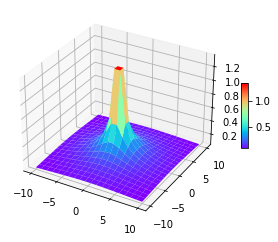

In [18]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})
surf = ax.plot_surface(xv, yv, v, cmap='rainbow')
fig.colorbar(surf, shrink=0.3, aspect=10)


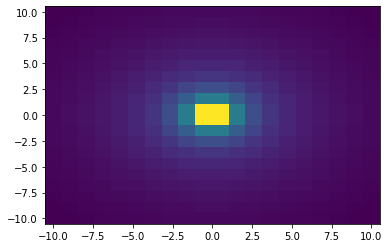

In [19]:
plt.pcolormesh(xv, yv, v,shading='auto')


### Oppgave 2: Elektrisk Felt

Det elektriske felt for en punktpartikkel er også kjent fra Coloumbs lov, men generelt hvis man vet potensialet kan en finne det elektriske feltet ved å bruke gradienten, $\vec{E}=-\nabla V$. I én dimensjon er gradienten kun en vanlig derivert, og vi får $E(r) = -\frac{\text{d}V(r)}{\text{d}r}$. En kan beregne dette numerisk ved å diskretisere derivasjonen,
\begin{equation}
    E(r_\text{i}) = -\frac{V(r_\text{i+1})-V(r_\text{i-1})}{r_\text{i+1}-r_\text{i-1}}\text{.}
\end{equation}
Dette er et eksempel på en finite difference quotient, mer spesifikt er dette en $\textit{central finite difference quotient}$. 

$\textbf{a)}$ Utled en diskret formulering for gradienten i to dimensjoner med bruk av finite difference quotients.

----------------

------------------

$\textbf{b)}$ Lag en funksjon som tar inn et potensial $\texttt{V}$ som argument, regner ut gradienten i hvert punkt, og returnerer det elektriske feltet som to $n-2 \times n-2$ arrays (årsaken til at dimensjonen blir $n-2$ og ikke $n$ er at man ikke kan beregne gradienten på randen med central finite differences, men må da bruke enten det som kalles forward/backward finite differences).

$\textit{Hint:}$ Bruk array slicing for å gjøre koden mer effektiv.

In [20]:
def gradient_V(V):
    E_x = V[1:-1,2:n] - V[1:-1,0:-2]
    E_y = V[2:n,1:-1] - V[0:-2,1:-1]
    dx = x[2]-x[1]
    
    E_x = -E_x / dx
    E_y = -E_y / dx
    
    x_q = x[1:-1]
    y_q = y[1:-1]
    
    return E_x, E_y, x_q, y_q

$\textbf{c)}$ Plot det dimensjonsløse elektriske feltet til en punktpartikkel i to dimensjoner ved bruk av $\texttt{matplotlib}$s $\texttt{quiverplot}$.

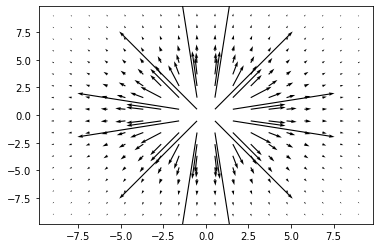

In [21]:
E_x, E_y, x_q, y_q = gradient_V(v)

plt.quiver(x_q, y_q, E_x, E_y)